# Case Study(Heart Disease)
This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

# Problem Statement
We need to predict if a person is suffering from heart disease or not. Output feature is num which contains values from 0 to 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
cleveland_df=pd.read_csv('clevelandDS.csv', header=None)

In [3]:
cleveland_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA

In [4]:
cleveland_df.columns=['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num']

In [5]:
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In sex column 0 represents female and 1 male

In [6]:
cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [7]:
cleveland_df.shape

(303, 14)

In [8]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Observation:

i. trestbps, chol etc contains outliers. As 75%le is far less than 100%le.

ii. fbs seems to have few 1 rest all values are zeros. It might not be of much value. Need further exploration.

In [9]:
cleveland_df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

ca and thal have some null values it seems as they have ? for null values

In [10]:
columns=cleveland_df.columns
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [11]:
#get the value counts for each columns
for i in columns:
    print(f"The value counts for column {i} is as follows \n{cleveland_df[i].value_counts()}")
    print("*"*100)

The value counts for column age is as follows 
58.0    19
57.0    17
54.0    16
59.0    14
52.0    13
60.0    12
51.0    12
56.0    11
62.0    11
44.0    11
41.0    10
64.0    10
67.0     9
63.0     9
42.0     8
43.0     8
53.0     8
65.0     8
55.0     8
61.0     8
45.0     8
46.0     7
66.0     7
50.0     7
48.0     7
47.0     5
49.0     5
39.0     4
68.0     4
35.0     4
70.0     4
69.0     3
40.0     3
71.0     3
34.0     2
37.0     2
38.0     2
74.0     1
29.0     1
77.0     1
76.0     1
Name: age, dtype: int64
****************************************************************************************************
The value counts for column sex is as follows 
1.0    206
0.0     97
Name: sex, dtype: int64
****************************************************************************************************
The value counts for column cp is as follows 
4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64
**********************************************************************

Features like ca and thal have null values

Target variable num has 4 values where we can consider 0 is for the person not having heart disease but 1,2,3 qnd 4 have heart disease. So we can convert 1,2,3,4 with 1 and leave 0 as is.

In [12]:
cleveland_df.num=cleveland_df.num.map({0:0,1:1,2:1,3:1,4:1})

In [13]:
cleveland_df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [14]:
# Imputing Null values
cleveland_df['ca'].replace('?',cleveland_df.ca.mode()[0],inplace=True)
cleveland_df['thal'].replace('?',cleveland_df.thal.mode()[0], inplace=True)
cleveland_df['ca'] = cleveland_df['ca'].astype(float)
cleveland_df['thal'] = cleveland_df['thal'].astype(float)

In [15]:
cleveland_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [16]:
cleveland_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


In [17]:
cleveland_df['thal'].value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

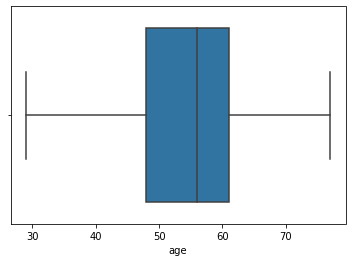

In [18]:
# boxplot
sns.boxplot(cleveland_df['age'])

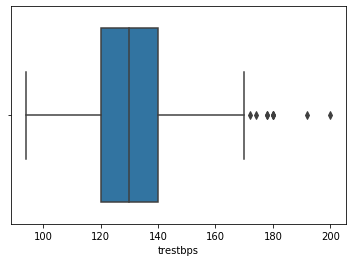

In [19]:
sns.boxplot(cleveland_df['trestbps'])

Outliers are present in trestbps dataset

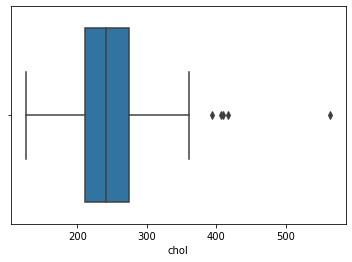

In [20]:
sns.boxplot(cleveland_df['chol'])

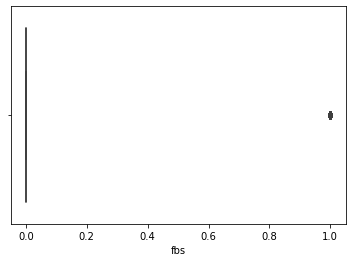

In [21]:
sns.boxplot(cleveland_df['fbs'])

We won't remove Outliers as they might be of use and data in hand is very less. 

I have decided to work with data available.

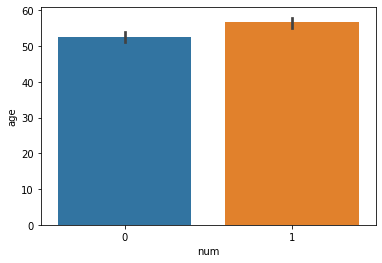

In [22]:
# Barplot
sns.barplot(x='num',y='age',data=cleveland_df)

Above 52 age are more likely to have heart disease

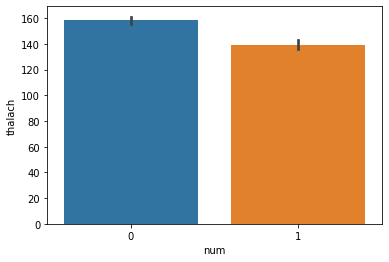

In [23]:
sns.barplot(x='num',y='thalach',data=cleveland_df)

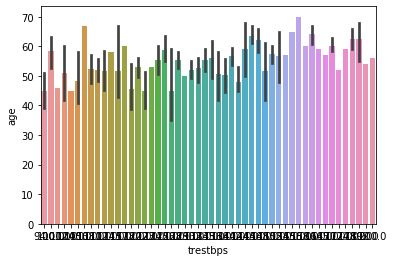

In [24]:
sns.barplot(x='trestbps',y='age',data=cleveland_df)

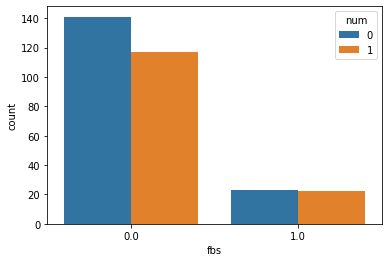

In [25]:
sns.countplot(x='fbs',hue='num',data=cleveland_df)

If it is 1 that means fasting blood sugar level is >120mg/dl. Chances of having Heart disease is 50%.

Else 0, Chances of not having Heart disease is higher than having.

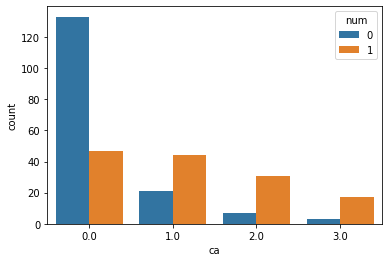

In [26]:
sns.countplot(x='ca',hue='num',data=cleveland_df)

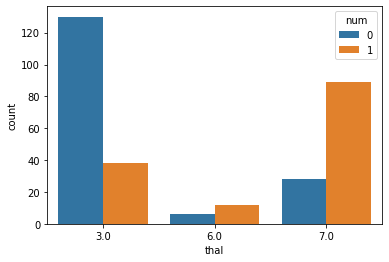

In [27]:
sns.countplot(x='thal',hue='num',data=cleveland_df)

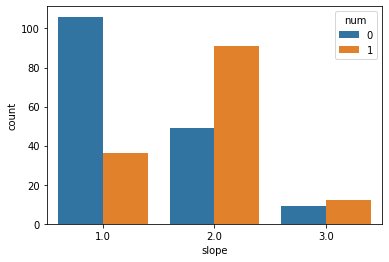

In [28]:
sns.countplot(x='slope',hue='num',data=cleveland_df)

Observation:
Slope, thal and ca are can be an important feature for prediction. information gain is higher in these features.

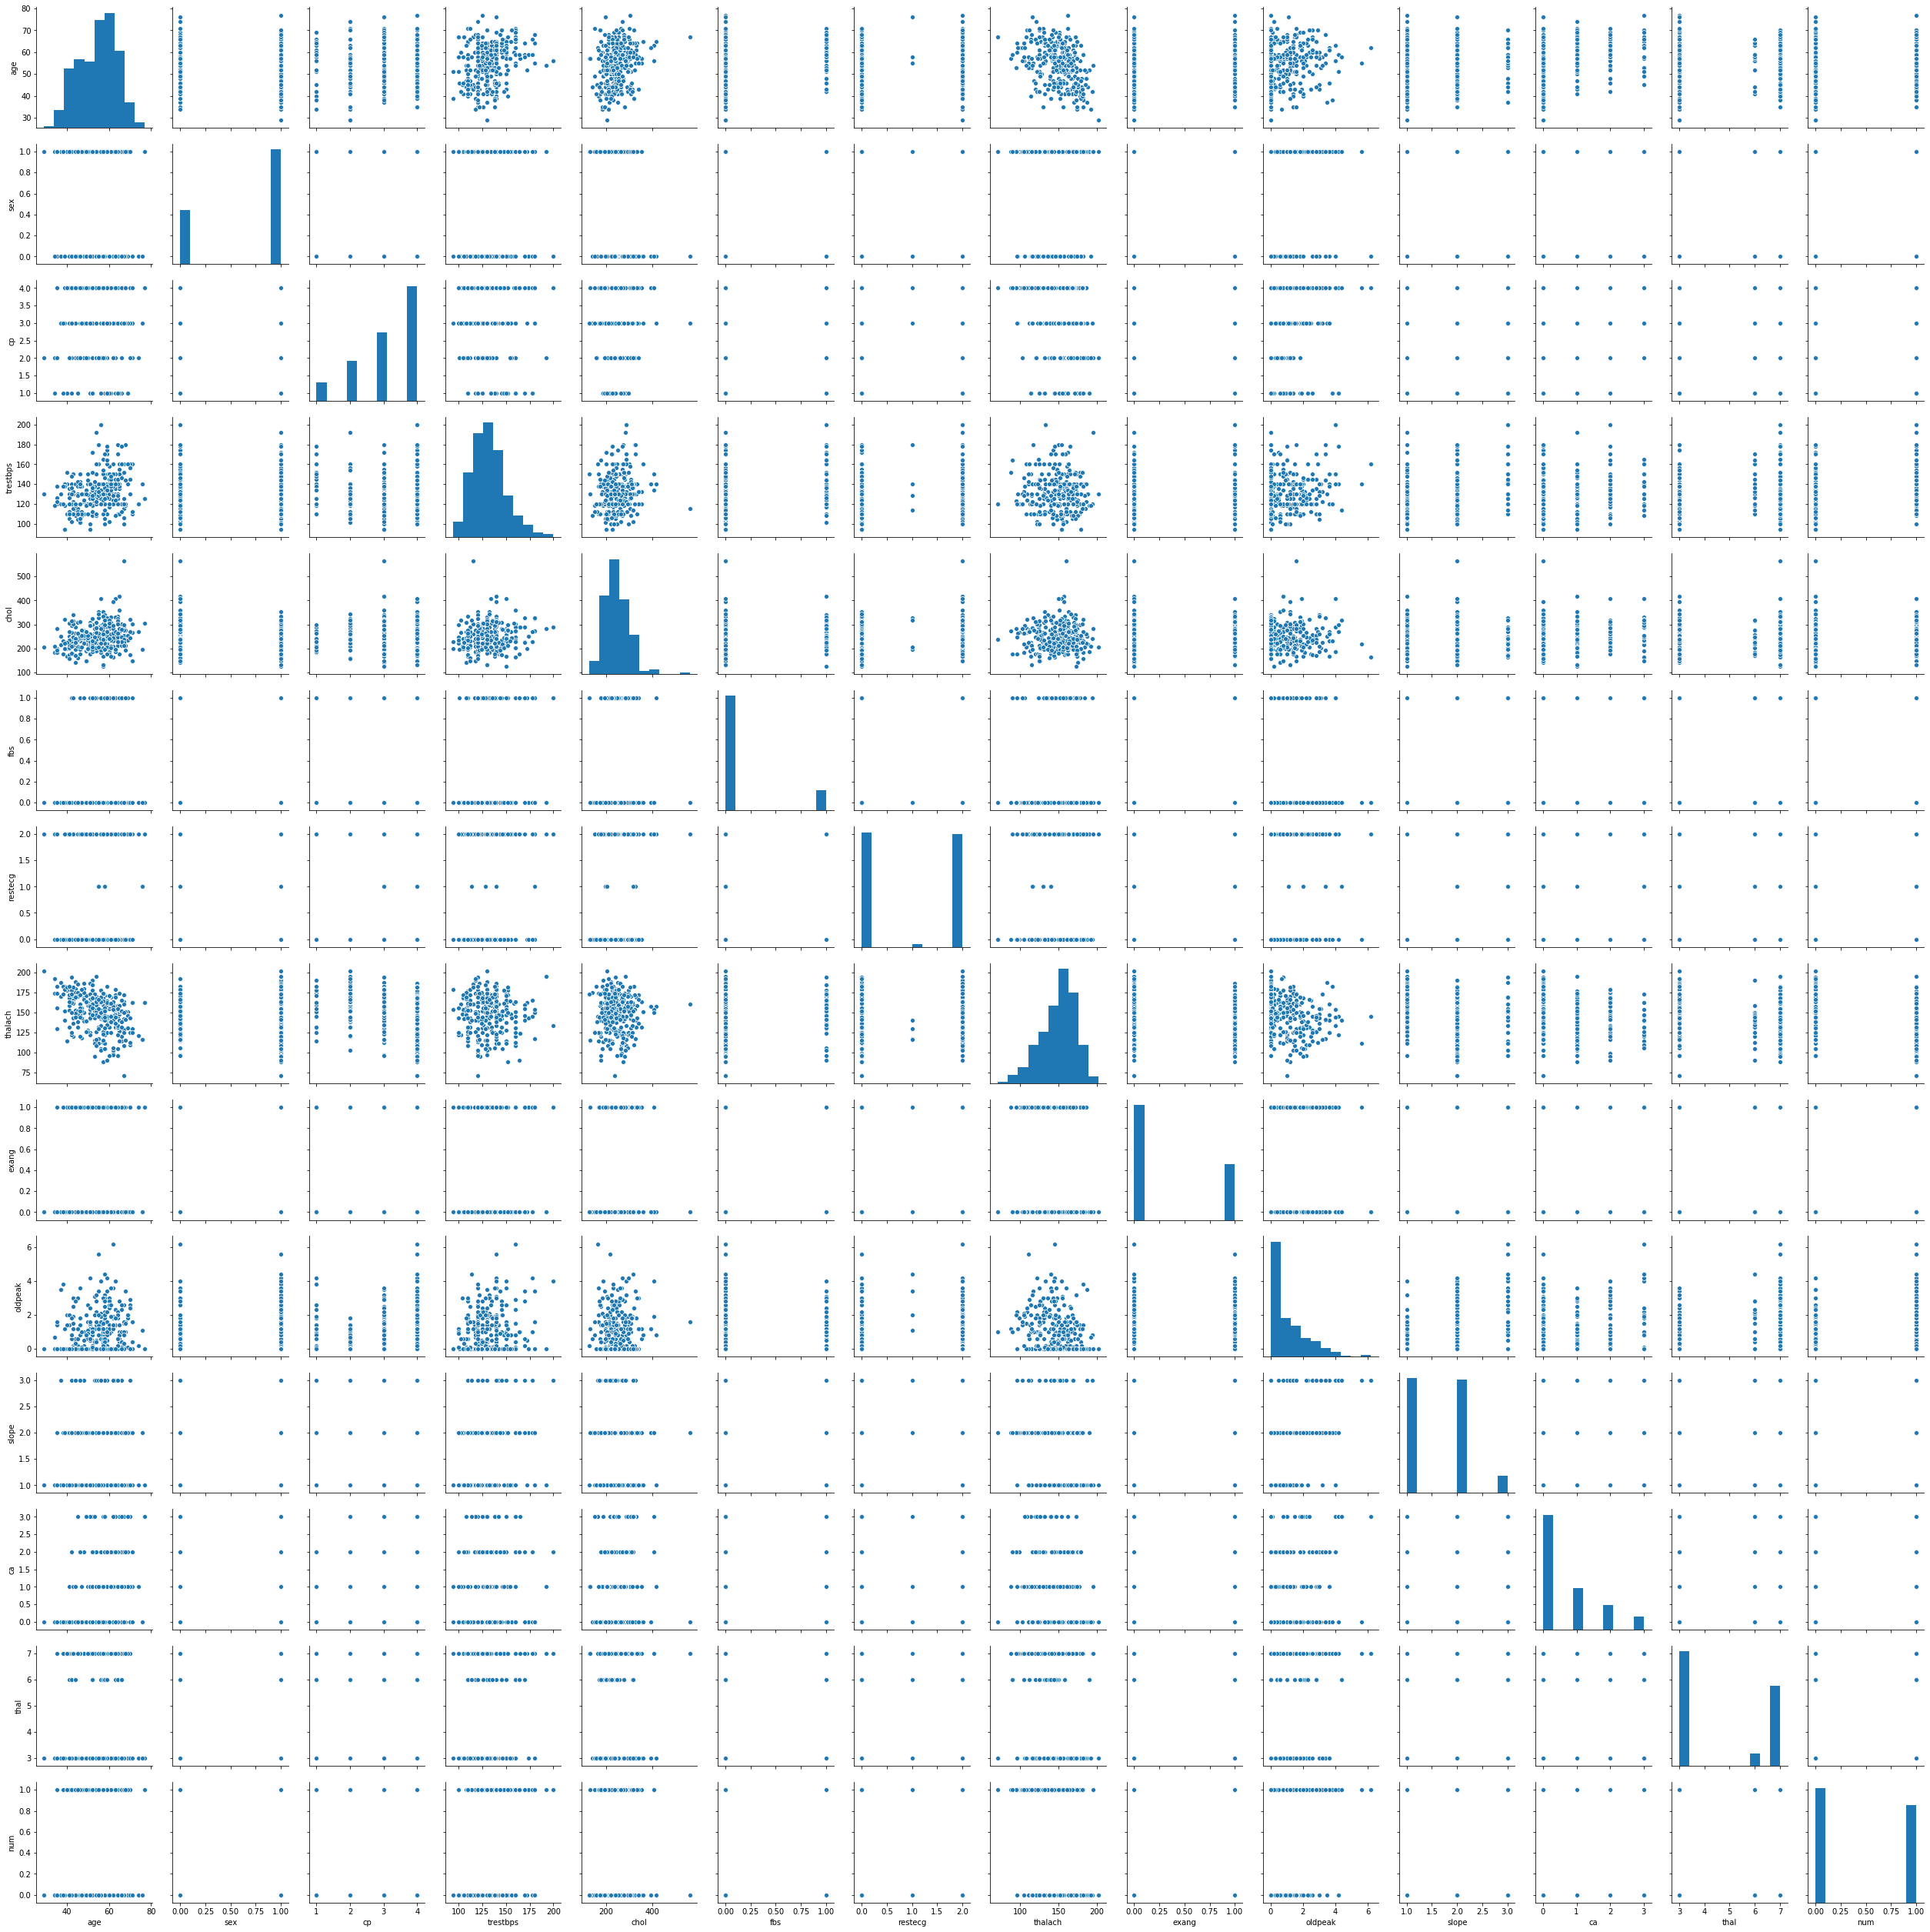

In [29]:
# pairplot
sns.pairplot(cleveland_df)

(14.0, 0.0)

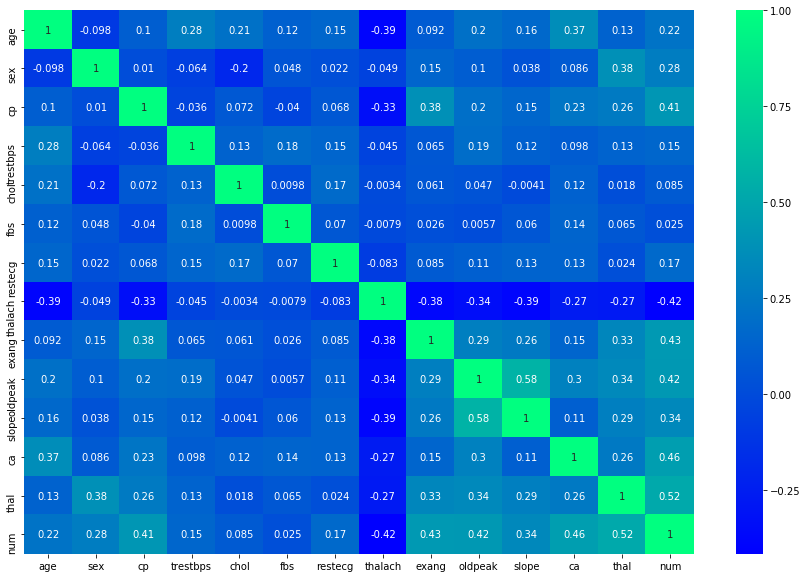

In [33]:
# correlation plot
corr_mat=cleveland_df.corr()
plt.figure(figsize=(15,10))
ax=sns.heatmap(corr_mat,annot=True,cmap='winter')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Observation:

i. restecg, fbs, chol are not correlated to num feature.

ii. Thalach is highly correlated to cp and age.

# Model Selection

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

### Normalisation

In [35]:
Y=cleveland_df['num']
X=cleveland_df.drop('num',axis=1)

In [36]:
print(X.shape,Y.shape)

(303, 13) (303,)


In [37]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [38]:
cols2norm=['age','fbs','chol','thalach','trestbps','oldpeak']

for col in cols2norm:
    X[col]=(X[col]-min(X[col]))/(max(X[col])-min(X[col]))

In [39]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.0,6.0
1,0.791667,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,3.0,3.0
2,0.791667,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,2.0,7.0
3,0.166667,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.0,3.0
4,0.250000,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.0,3.0


In [40]:
best_rstate=0
score=0
algo_list= [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),GradientBoostingClassifier(), RandomForestClassifier()]
for algo in algo_list:
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
        mod=algo
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        tempscore=accuracy_score(y_test,y_pred)
        if tempscore>score:
            score=tempscore
            best_rstate=i
    print(f"Best accuracy Score {score*100} found with {algo} at random state {best_rstate} \n")

Best accuracy Score 93.42105263157895 found with LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) at random state 82 

Best accuracy Score 93.42105263157895 found with DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') at random state 82 

Best accuracy Score 93.42105263157895 found with MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) at random state 82 

B

All algorithms are giving more than 90% accuracy so we can use any one of them to finalise our model.

Using SVC to release the model.

In [41]:
svm=SVC(kernel='rbf')
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=82,test_size=0.2)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
print("Accuracy score is {}".format(accuracy_score(pred,y_test)))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Accuracy score is 0.8852459016393442
[[29  5]
 [ 2 25]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.83      0.93      0.88        27

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



f1 score is good, let's check, whether we are over/under fitting the model.

In [42]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(svm,X,Y,cv=30,scoring='accuracy').mean()
print("std: {}".format(score.std()))
print("cross_val_score: {}".format(score*100))

std: 0.0
cross_val_score: 82.19865319865322


Implies, we are not over/under fitting the model. cross_val_score is good.

In [43]:
# Saving the model using joblib
import joblib
# Saving model as pickle in a file
joblib.dump(svm,'svm_HeartDisease.pkl')

['svm_HeartDisease.pkl']